In [1]:
import zipfile
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import fiona
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
from sklearn.cluster import KMeans
#add necessary libraries
import networkx as nx #library supporting networks

In [2]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='Data/Subway Stations.geojson')
fname = 'Subway Stations.geojson'
print (fname)
subStations = gpd.GeoDataFrame.from_file('Data/Subway Stations.geojson')

subStations.crs = from_epsg(4326)

Subway Stations.geojson


In [3]:
subStations.columns

Index([u'geometry', u'line', u'name', u'notes', u'objectid', u'url'], dtype='object')

In [4]:
subStations.head()

,geometry,line,name,notes,objectid,url
0,POINT (-73.99106999861967 40.73005400028978),4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1,http://web.mta.info/nyct/service/
1,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2,http://web.mta.info/nyct/service/
2,POINT (-73.98384899986625 40.76172799961419),1-2,50th St,"1-all times, 2-nights",3,http://web.mta.info/nyct/service/
3,POINT (-73.97499915116808 40.68086213682956),2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4,http://web.mta.info/nyct/service/
4,POINT (-73.89488591154061 40.66471445143568),3-4,Pennsylvania Ave,"4-nights, 3-all other times",5,http://web.mta.info/nyct/service/


In [12]:
for i in subStations.line:
    print i.replace(' Express','').split('-')
    print map(lambda x: x,i.replace(' Express','').split('-'))
    break
    

[u'4', u'6', u'6']
[u'4', u'6', u'6']


In [14]:
G=nx.Graph()
G.add_nodes_from(subStations.name)

In [19]:
def getXY(pt):
    return (pt.x, pt.y)

In [23]:
stationpos={}
subStations['longlat']= subStations.geometry.map(getXY)
for station in subStations.index:
    stationpos[subStations.name[station]]=subStations['longlat'][station]
    

In [17]:
fname = 'Data/CensusTracks.geojson'
tracks = gpd.GeoDataFrame.from_file(fname)
print tracks.crs 
tracks.head()

{}


,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,ntacode,ntaname,puma,shape_area,shape_leng
0,5,5000900,Staten Island,I,000900,9,(POLYGON ((-74.07920577013245 40.6434307837456...,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.01679376
1,1,1009800,Manhattan,I,009800,98,(POLYGON ((-73.96432543478758 40.7563815309909...,MN19,Turtle Bay-East Midtown,3808,1906016.35002,5534.19981063
2,1,1010000,Manhattan,I,010000,100,(POLYGON ((-73.96802436915851 40.7595781400528...,MN19,Turtle Bay-East Midtown,3808,1860938.37721,5692.16873705
3,1,1010200,Manhattan,I,010200,102,(POLYGON ((-73.97124277307127 40.7609364184790...,MN17,Midtown-Midtown South,3807,1860992.70485,5687.80243866
4,1,1010400,Manhattan,I,010400,104,(POLYGON ((-73.97445730550224 40.7622930835248...,MN17,Midtown-Midtown South,3807,1864600.41684,5693.03636727


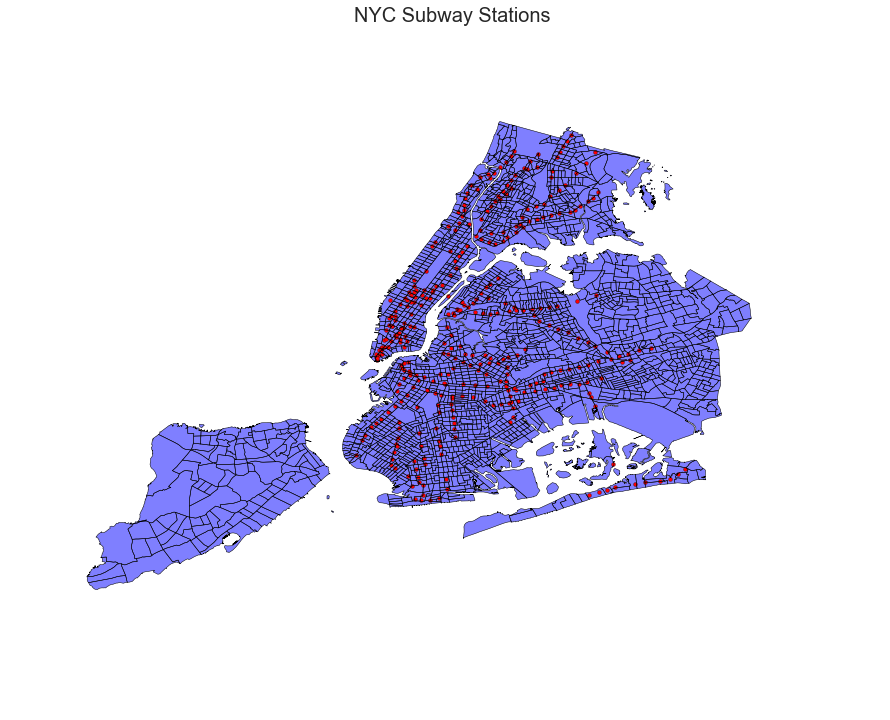

In [28]:
f, ax = pl.subplots(figsize=(15,12))

tracks.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue')
pl.axis('off')

nx.draw(G,pos=stationpos,with_labels=False,arrows=True,node_size=15,style='dotted',edge_color='green')
pl.title("NYC Subway Stations", size=20)

In [ ]:
if i in subStations.line:
    print i.replace(' Express','').split('-')
    print map(lambda x: x,i.replace(' Express','').split('-'))
    break

In [36]:
Amask=[]
for lines in subStations.line:
    if 'A' in lines:
        Amask.append(True)
    else:
        Amask.append(False)

In [140]:
distmat=np.empty((len(subStations[Amask]),), dtype=float)
print distmat.shape
for stations in subStations[Amask]['geometry']:
    distances=[]
    for other in subStations[Amask]['geometry']:
        distances.append(stations.distance(other))
    #print len(distances)
    distmat = np.vstack((distmat,np.array(distances)))
distmat = np.delete(distmat, 0, 0)
print distmat.shape
distmat

(66L,)
(66L, 66L)


array([[ 0.        ,  0.12188338,  0.25347895, ...,  0.15187305,
         0.16106103,  0.15654966],
       [ 0.12188338,  0.        ,  0.14890699, ...,  0.06890286,
         0.08938903,  0.08186883],
       [ 0.25347895,  0.14890699,  0.        , ...,  0.10230584,
         0.09948539,  0.10110573],
       ..., 
       [ 0.15187305,  0.06890286,  0.10230584, ...,  0.        ,
         0.02111373,  0.01370872],
       [ 0.16106103,  0.08938903,  0.09948539, ...,  0.02111373,
         0.        ,  0.0075368 ],
       [ 0.15654966,  0.08186883,  0.10110573, ...,  0.01370872,
         0.0075368 ,  0.        ]])

In [160]:
#subStations[Amask].name
for i in range(len(subStations[Amask])):
    np.sort(distmat[i],kind='quicksort')[1]
    np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]
    print subStations[Amask].iloc[i]['name'], ',',str(subStations[Amask].iloc[np.where( distmat[i] == np.sort(distmat[i],kind='quicksort')[1])[0][0]]['name'])

Cathedral Pkwy (110th St) , 116th St
Kingston - Throop Aves , Nostrand Ave
Beach 105th St , Beach 98th St
Beach 90th St , Beach 98th St
Ralph Ave , Rockaway Ave
Far Rockaway - Mott Ave , Beach 25th St
72nd St , 81st St
96th St , 103rd St
168th St , 163rd St - Amsterdam Av
111th St , 104th St
104th St , 111th St
Broad Channel , Beach 90th St
Rockaway Blvd , 104th St
Rockaway Ave , Broadway Junction
Aqueduct Racetrack , Aqueduct - North Conduit Av
Nostrand Ave , Franklin Ave
103rd St , 96th St
81st St , 86th St
86th St , 81st St
175th St , 181st St
Beach 44th St , Beach 36th St
Beach 60th St , Beach 67th St
Beach 98th St , Beach 105th St
Rockaway Park - Beach 116 St , Beach 105th St
Beach 36th St , Beach 44th St
Beach 25th St , Far Rockaway - Mott Ave
Grant Ave , 80th St
Ozone Park - Lefferts Blvd , 111th St
Beach 67th St , Beach 60th St
W 4th St - Washington Sq (Upper) , Spring St
Van Siclen Ave , Liberty Ave
Shepherd Ave , Euclid Ave
Howard Beach - JFK Airport , Aqueduct - North Condui

In [ ]:
### A Nodes
AEdges=[
    ('Inwood - 207th St', 'Dyckman St'),
    ('Dyckman St', '190th St'),
    ('190th St', '181st St'),
    ('181st St', '175th St'),
    ('175th St','168th St'),
    ('168th St','145th St'),
    ('145th St','125th St'),
    ('125th St','59th St - Columbus Circle'),
    ('59th St - Columbus Circle','42nd St - Port Authority Bus Term'), 
    ('42nd St - Port Authority Bus Term','34th St - Penn Station'),
    ('34th St - Penn Station','14th St'),
    ('14th St','W 4th St - Washington Sq (Upper)'),
    ('W 4th St - Washington Sq (Upper)','Canal St - Holland Tunnel'),
    ('Canal St - Holland Tunnel','Chambers St'),
    ('Chambers St','Fulton St'),
    ('Fulton St','High St'),
    ('High St','Jay St - MetroTech'),
    ('Jay St - MetroTech','Hoyt - Schermerhorn Sts'),
    ('Hoyt - Schermerhorn Sts','Nostrand Ave'),
    ('Nostrand Ave','Utica Ave'),
    ('Utica Ave','Broadway Junction'),
    ('Broadway Junction','Euclid Ave'),
    ('Euclid Ave','Grant Ave'),
    ('Grant Ave','80th St'),
    ('80th St','88th St'),
    ('88th St','Rockaway Blvd'),
    ('Rockaway Blvd','104th St'),
    ('104th St','111th St'),
    ('111th St','Ozone Park - Lefferts Blvd'),
    ('Rockaway Blvd','Aqueduct - North Conduit Av'),
    ('Aqueduct Racetrack','Rockaway Blvd'),
    ('Aqueduct - North Conduit Av','Howard Beach - JFK Airport'),
    ('Howard Beach - JFK Airport','Aqueduct Racetrack'),
    ('Howard Beach - JFK Airport','Broad Channel'),
    ('Broad Channel','Beach 67th St'),
    ('Beach 67th St','Beach 60th St'),
    ('Beach 60th St','Beach 44th St'),
    ('Beach 44th St','Beach 36th St'),
    ('Beach 36th St','Beach 25th St'),
    ('Beach 25th St','Far Rockaway - Mott Ave')]


Cathedral Pkwy (110th St) , 116th St
Kingston - Throop Aves , Nostrand Ave
Beach 105th St , Beach 98th St
Beach 90th St , Beach 98th St
Ralph Ave , Rockaway Ave
Far Rockaway - Mott Ave , Beach 25th St
72nd St , 81st St
96th St , 103rd St
168th St , 163rd St - Amsterdam Av
111th St , 104th St
104th St , 111th St
Broad Channel , Beach 90th St
Rockaway Blvd , 104th St
Rockaway Ave , Broadway Junction
Aqueduct Racetrack , Aqueduct - North Conduit Av
Nostrand Ave , Franklin Ave
103rd St , 96th St
81st St , 86th St
86th St , 81st St
175th St , 181st St
Beach 44th St , Beach 36th St
Beach 60th St , Beach 67th St
Beach 98th St , Beach 105th St
Rockaway Park - Beach 116 St , Beach 105th St
Beach 36th St , Beach 44th St
Beach 25th St , Far Rockaway - Mott Ave
Grant Ave , 80th St
Ozone Park - Lefferts Blvd , 111th St
Beach 67th St , Beach 60th St
W 4th St - Washington Sq (Upper) , Spring St
Van Siclen Ave , Liberty Ave
Shepherd Ave , Euclid Ave
Howard Beach - JFK Airport , Aqueduct - North Conduit Av
Aqueduct - North Conduit Av , Aqueduct Racetrack
Inwood - 207th St , Dyckman St
145th St , 155th St
Utica Ave , Ralph Ave
50th St , 42nd St - Port Authority Bus Term
59th St - Columbus Circle , 50th St
Fulton St , Chambers St
Chambers St , Fulton St
42nd St - Port Authority Bus Term , 34th St - Penn Station
Hoyt - Schermerhorn Sts , Jay St - MetroTech
Jay St - MetroTech , Hoyt - Schermerhorn Sts
Liberty Ave , Van Siclen Ave
Broadway Junction , Rockaway Ave
Spring St , Canal St - Holland Tunnel
181st St , 175th St
190th St , 181st St
116th St , Cathedral Pkwy (110th St)
125th St , 116th St
Canal St - Holland Tunnel , Spring St
155th St , 163rd St - Amsterdam Av
163rd St - Amsterdam Av , 168th St
Dyckman St , Inwood - 207th St
23rd St , 14th St
34th St - Penn Station , 42nd St - Port Authority Bus Term
135th St , 145th St
14th St , 23rd St
Franklin Ave , Nostrand Ave
Clinton - Washington Aves , Lafayette Ave
High St , Jay St - MetroTech
Lafayette Ave , Clinton - Washington Aves
Euclid Ave , Grant Ave
88th St , 80th St
80th St , Grant Ave

In [152]:
subStations[Amask].head()

,geometry,line,name,notes,objectid,url,longlat
6,POINT (-73.95806670661364 40.80058155811496),A-B-C,Cathedral Pkwy (110th St),"A-nights, B-weekdays and evenings, C-all times...",7,http://web.mta.info/nyct/service/,"(-73.9580667066, 40.8005815581)"
7,POINT (-73.94085899871263 40.67991899941601),A-C,Kingston - Throop Aves,"A-nights, C-all other times",8,http://web.mta.info/nyct/service/,"(-73.9408589987, 40.6799189994)"
15,POINT (-73.82758075034528 40.58326843810286),A-S,Beach 105th St,"A-rush hours AM northbound, PM southbound, S B...",16,http://web.mta.info/nyct/service/,"(-73.8275807503, 40.5832684381)"
16,POINT (-73.81365140419632 40.58809156457325),A-S,Beach 90th St,"A-rush hours AM northbound, PM southbound, S B...",17,http://web.mta.info/nyct/service/,"(-73.8136514042, 40.5880915646)"
37,POINT (-73.92078599933306 40.67882200087338),A-C,Ralph Ave,"A-nights, C-all other times",38,http://web.mta.info/nyct/service/,"(-73.9207859993, 40.6788220009)"
